[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1xPYRL3nIuJ5u-joaljVoa2AHv7U-RiZN)

This notebook read bottom values from an Echoview `.evl` file and plots them superimposed on the corresponing sonar data.

In [7]:
# importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [8]:
# gdown is used to download data
!pip install gdown

In [9]:
# installing echopype
!pip install -q echopype==0.5.0

In [10]:
# install echoregions package (I should fix to the current version in the repo?)
!pip install git+https://github.com/OSOceanAcoustics/echoregions@45b8a80644468107f9d092e028c787e757b7dd85

  Cloning https://github.com/OSOceanAcoustics/echoregions (to revision 45b8a80644468107f9d092e028c787e757b7dd85) to /tmp/pip-req-build-kdetocnd
  Running command git clone -q https://github.com/OSOceanAcoustics/echoregions /tmp/pip-req-build-kdetocnd
  Running command git rev-parse -q --verify 'sha^45b8a80644468107f9d092e028c787e757b7dd85'
  Running command git fetch -q https://github.com/OSOceanAcoustics/echoregions 45b8a80644468107f9d092e028c787e757b7dd85
  Running command git checkout -q 45b8a80644468107f9d092e028c787e757b7dd85


In [11]:
import echoregions as er

### Bottom Data Reading

In [12]:
# path to evl files
TEST_DATA_PATH = 'https://raw.githubusercontent.com/OSOceanAcoustics/echoregions/main/echoregions/test_data'

In [13]:
# download an example file
!wget https://raw.githubusercontent.com/OSOceanAcoustics/echoregions/main/echoregions/test_data/x1.evl -O x1.evl

--2022-05-10 19:20:45--  https://raw.githubusercontent.com/OSOceanAcoustics/echoregions/main/echoregions/test_data/x1.evl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246625 (241K) [text/plain]
Saving to: ‘x1.evl’

x1.evl              100%[===================>] 240.84K  --.-KB/s    in 0.007s  

2022-05-10 19:20:45 (32.3 MB/s) - ‘x1.evl’ saved [246625/246625]



In [14]:
# check the file which has bottom lines overlapping with the sample of sonar files on Google Drive
!tail -n 5 x1.evl

20170626 0219569940  84.898303 3
20170626 0219598180  84.860518 3
20170626 0220026990  85.528454 3
20170626 0220055720  85.472250 3
20170626 0220084430  85.260804 0


In [15]:
!head -n 5 x1.evl

﻿EVBD 3 12.0.341.42620
7105
20170625 1504281370  496.834625 1
20170625 1504281370  496.834625 3
20170625 1504358950  496.838999 3


In [16]:
# read an example .evl file
line = er.read_evl('x1.evl')
line

#### Line as a DataFrame

`line` is a specialized object but it has a `data` attribute which is a simple dataframe.

In [17]:
# store the object's data in a dataframe
line_df = line.data

In [18]:
line_df

,file_name,file_type,evl_file_format_version,echoview_version,time,depth,status
0,x1,EVBD,3,12.0.341.42620,2017-06-25 15:04:28.137000,496.834625,1
1,x1,EVBD,3,12.0.341.42620,2017-06-25 15:04:28.137000,496.834625,3
2,x1,EVBD,3,12.0.341.42620,2017-06-25 15:04:35.895000,496.838999,3
3,x1,EVBD,3,12.0.341.42620,2017-06-25 15:04:35.896000,743.307494,3
4,x1,EVBD,3,12.0.341.42620,2017-06-25 15:40:43.910500,748.760741,3
...,...,...,...,...,...,...,...
7100,x1,EVBD,3,12.0.341.42620,2017-06-26 02:19:56.994000,84.898303,3
7101,x1,EVBD,3,12.0.341.42620,2017-06-26 02:19:59.818000,84.860518,3
7102,x1,EVBD,3,12.0.341.42620,2017-06-26 02:20:02.699000,85.528454,3
7103,x1,EVBD,3,12.0.341.42620,2017-06-26 02:20:05.572000,85.472250,3


In [19]:
# status 3 are good points
line_df = line_df[line_df['status']=='3']

In [20]:
# extract only the ping_time and depth columns
bottom = line_df[['time','depth']]
bottom

,time,depth
1,2017-06-25 15:04:28.137000,496.834625
2,2017-06-25 15:04:35.895000,496.838999
3,2017-06-25 15:04:35.896000,743.307494
4,2017-06-25 15:40:43.910500,748.760741
5,2017-06-25 15:40:43.911500,748.110964
...,...,...
7099,2017-06-26 02:19:54.169000,85.091041
7100,2017-06-26 02:19:56.994000,84.898303
7101,2017-06-26 02:19:59.818000,84.860518
7102,2017-06-26 02:20:02.699000,85.528454


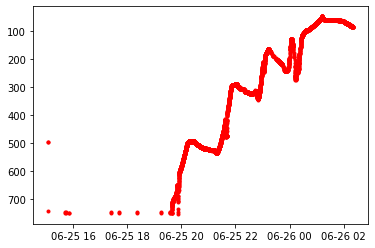

In [21]:
plt.plot(bottom['time'], bottom['depth'],'r.')
plt.gca().invert_yaxis()

### Sonar Data Reading
Here we will plot the backscatter for the set of files we have stored on Google Drive. We will just look at one frequency for simplicity.


In [22]:
# mounting the google drive (uncomment if you have permission to read directly from Google Drive)
# from google.colab import drive
# drive.mount('/content/drive/') 

In [23]:
# Paths for Google Drive read  (uncomment if you have permission to read directly from Google Drive)
# SONAR_PATH_Sv = '/content/drive/Shareddrives/uw-echospace/shared_data/SH1707/sample/Sv/'
# SONAR_PATH_raw = '/content/drive/Shareddrives/uw-echospace/shared_data/SH1707/sample/raw_converted'

In [24]:
# download a zipped sample folder from publicly available Google Drive
import gdown

url = 'https://drive.google.com/uc?id=1rPO8NaXS9cGtl0ex4KIc7HmT2PnXPg0S'
output = 'sample.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1rPO8NaXS9cGtl0ex4KIc7HmT2PnXPg0S
To: /content/sample.zip
100%|██████████| 1.67G/1.67G [00:16<00:00, 98.2MB/s]


'sample.zip'

In [25]:
# unzip into a sample folder
!unzip -o sample.zip

Archive:  sample.zip
   creating: sample/
   creating: sample/Sv/
   creating: sample/raw_converted/
  inflating: sample/Sv/Summer2017-D20170625-T124834_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T161209_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T134400_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T171948_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T193400_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T140924_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T190753_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T150430_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T223159_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T202452_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T234816_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T205018_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T220634_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T164600_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T181701_Sv.nc  

In [29]:
# Paths for local read
SONAR_PATH_Sv = './sample/Sv/'
SONAR_PATH_raw = './sample/raw_converted/'

In [30]:
import xarray as xr

In [31]:
# reading the processed Sv data
ds_Sv = xr.open_mfdataset(os.path.join(SONAR_PATH_Sv, '*.nc'))

In [32]:
# reading the processed platform data
ds_plat = xr.open_mfdataset(os.path.join(SONAR_PATH_raw, '*.nc'), group='Platform')

In [33]:
# assuming water levels are same for different frequncies and location_time
depth = ds_plat.water_level.isel(location_time=0, frequency=0, ping_time=0)+ds_Sv.range.isel(frequency=0, ping_time=0)

In [34]:
# creating a new depth dimension
ds_Sv['depth'] = depth
ds_Sv = ds_Sv.swap_dims({'range_bin': 'depth'})

### Plotting Sonar and Bottom

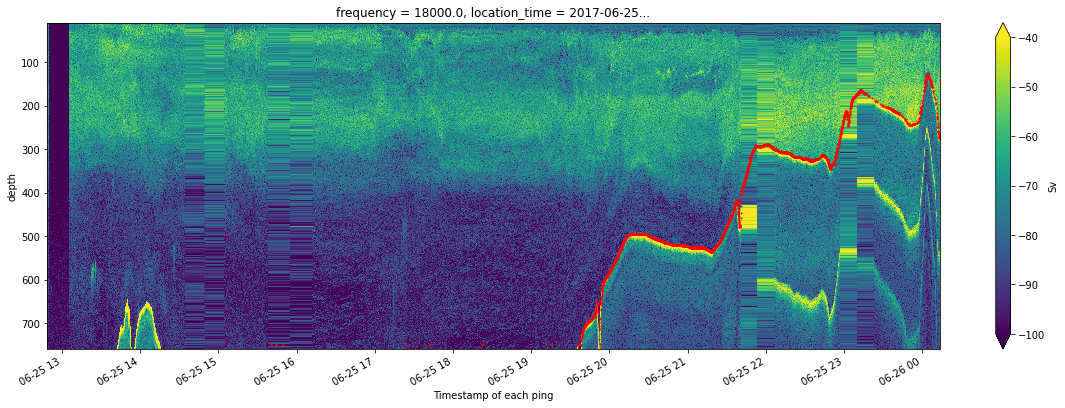

In [35]:
# plotting the sonar data and the bottom
plt.figure(figsize = (20, 6))
ds_Sv.Sv.isel(frequency=0).T.plot(yincrease=False, vmax=-40, vmin=-100)
plt.plot(bottom['time'], bottom['depth'],'ro',fillstyle='full', markersize=1)

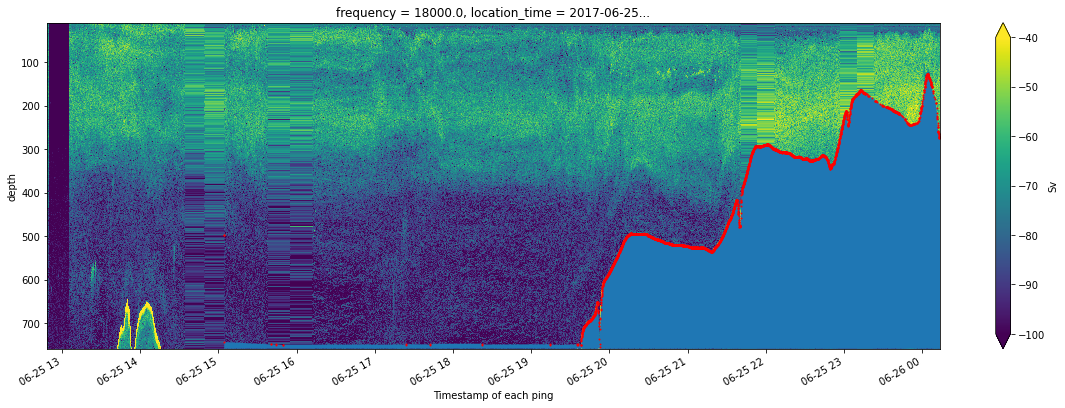

In [36]:
# plot filled bottom
plt.figure(figsize = (20, 6))
ds_Sv.Sv.isel(frequency=0).T.plot(yincrease=False, vmax=-40, vmin=-100)
plt.plot(bottom['time'], bottom['depth'],'ro',fillstyle='full', markersize=1)
plt.fill_between(bottom['time'], ds_Sv.Sv.depth.max(), bottom['depth'], interpolate = False)

Note that this filling interpolates between the points which is not desirable when the bottom points are very sparse.

### Plotting with `line`'s Built-in Plotting Method

The `line` object has a built-in plotting method which can shorten the above steps.

In [37]:
help(line.plot)

Help on method plot in module echoregions.formats.lines:

plot(fmt='', start_time=None, end_time=None, fill_between=False, max_depth=0, **kwargs) method of echoregions.formats.lines.Lines instance
    Plot the points in the EVL file.
    
    Parameters
    ----------
    fmt : str, optional
        A format string such as 'bo' for blue circles.
        See matplotlib documentation for more information.
    start_time : datetime64, default ``None``
        Lower time bound.
    end_time : datetime64, default ``None``
        Upper time bound.
    fill_between : bool, default True
        Use matplotlib `fill_between` to plot the line.
        The area between the EVL points and `max_depth` will be filled in.
    max_depth : float, default 0
        The `fill_between` function will color in the area betwen the points and
        this depth value given in meters.
    alpha : float, default 0.5
        Opacity of the plot
    kwargs : keyword arguments
        Additional arguments passed 

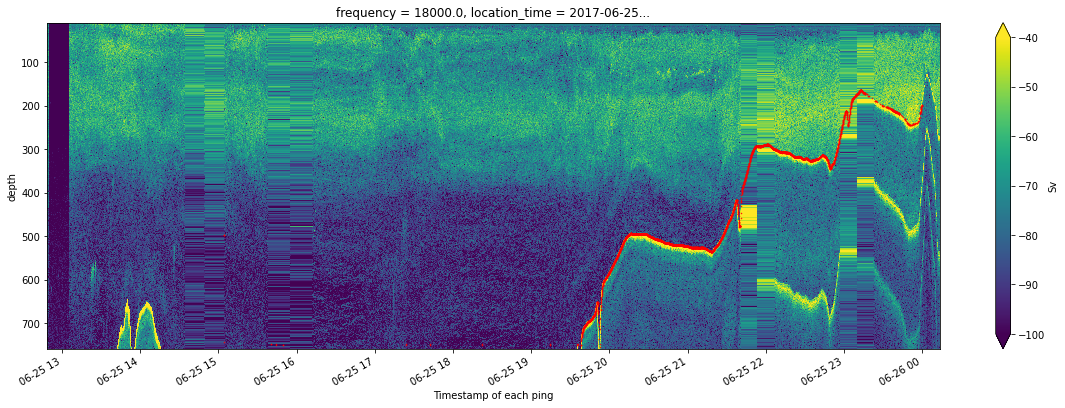

In [38]:
from datetime import datetime

# making starting and ending times
start_time = datetime(2017, 6, 25)
end_time = datetime(2017, 6, 26)

plt.figure(figsize = (20, 6))
ds_Sv.Sv.isel(frequency=0).T.plot(yincrease=False, vmax=-40, vmin=-100)
line.plot(start_time=start_time, end_time=end_time, fill_between=False, linestyle='', marker='.', color='r', markersize=1)

In [39]:
# Note in the above plot we did not restrict to "good" points only.